# Initial Data Analysis
* This notebook analyzes the data in the data frame Total_Number_of_Drug_Intoxication_Deaths_by_Selected_Substances__2007-2016.csv


### History 
* 11/13/20 - set up analysis notebook, and performed initial analysis to answer questions related to my overall research question

### Overall Question I want to answer
* How do drugs affect a person's health? 
* I will answer this question by examining the data from Total_Number_of_Drug_Intoxication_Deaths_by_Selected_Substances__2007-2016.csv and investigate this data to see the what type of substances that caused the most deaths and least deaths. 

## Questions
Q1. What substance lead to the most amount of deaths?
Q2. What year had the most amount of deaths?

* Steps 
    * Load in data
    * Look at column names 
    * subset data frame by rows to look at data from 2010-2016 using row indices 2-9. 
    * Use sum() function to see the substance that caused the most deaths. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load and investigate the data 
substances_df = pd.read_csv('../data/Total_Number_of_Drug_Intoxication_Deaths_by_Selected_Substances__2007-2016.csv')

In [3]:
substances_df

,Calendar Year,Heroin Deaths,Prescription Opioid Deaths,Alcohol Deaths,Benzodiazepine Deaths,Cocaine Deaths,Fentanyl Deaths
0,2008,289,280,175,48,157,25
1,2009,360,251,162,52,162,27
2,2010,238,311,160,58,135,39
3,2011,247,342,161,68,148,26
4,2012,392,311,195,73,153,29
5,2013,464,316,238,69,154,58
6,2007,399,302,187,37,248,26
7,2014,578,330,270,103,198,186
8,2015,748,351,310,91,221,340
9,2016,1212,418,582,126,463,1119


In [4]:
# look at column names to see type of substances
substances_df.columns

Index(['Calendar Year', 'Heroin Deaths', 'Prescription Opioid Deaths',
       'Alcohol Deaths', 'Benzodiazepine Deaths', 'Cocaine Deaths',
       'Fentanyl Deaths'],
      dtype='object')

In [5]:
substances_df.head()

,Calendar Year,Heroin Deaths,Prescription Opioid Deaths,Alcohol Deaths,Benzodiazepine Deaths,Cocaine Deaths,Fentanyl Deaths
0,2008,289,280,175,48,157,25
1,2009,360,251,162,52,162,27
2,2010,238,311,160,58,135,39
3,2011,247,342,161,68,148,26
4,2012,392,311,195,73,153,29


In [6]:
substances_df.tail()

,Calendar Year,Heroin Deaths,Prescription Opioid Deaths,Alcohol Deaths,Benzodiazepine Deaths,Cocaine Deaths,Fentanyl Deaths
5,2013,464,316,238,69,154,58
6,2007,399,302,187,37,248,26
7,2014,578,330,270,103,198,186
8,2015,748,351,310,91,221,340
9,2016,1212,418,582,126,463,1119


In [7]:
substances_df.sample()

,Calendar Year,Heroin Deaths,Prescription Opioid Deaths,Alcohol Deaths,Benzodiazepine Deaths,Cocaine Deaths,Fentanyl Deaths
6,2007,399,302,187,37,248,26


In [8]:
substances_df.plot()

<AxesSubplot:>

Looking at the columns, I see that the deaths are broken up by substance. 

### Observation: 
* In 2016 there were 1119 Fentanyl deaths compared to 2008 where there were only 25 reported Fentanyl deaths. 

In [9]:
# subset data frame to look at years 2010 - 2016 
substances_df = substances_df.loc[2:9]

In [10]:
substances_df

,Calendar Year,Heroin Deaths,Prescription Opioid Deaths,Alcohol Deaths,Benzodiazepine Deaths,Cocaine Deaths,Fentanyl Deaths
2,2010,238,311,160,58,135,39
3,2011,247,342,161,68,148,26
4,2012,392,311,195,73,153,29
5,2013,464,316,238,69,154,58
6,2007,399,302,187,37,248,26
7,2014,578,330,270,103,198,186
8,2015,748,351,310,91,221,340
9,2016,1212,418,582,126,463,1119


In [11]:
#renaming the columns to fit my preferences and for ease when coding: 
sname_dict = {
    "Calendar Year": "calendar_yr", 
    "Heroin Deaths": "heroin_deaths", 
    "Prescription Opioid Deaths": "opioid_deaths", 
    "Alcohol Deaths": "alcohol_deaths", 
    "Benzodiazepine Deaths": "benzo_deaths", 
    "Cocaine Deaths": "cocaine_deaths",
    "Fentanyl Deaths": "fentanyl_deaths"
}

In [12]:
substances_df = substances_df.rename(columns=sname_dict)

In [13]:
substances_df

,calendar_yr,heroin_deaths,opioid_deaths,alcohol_deaths,benzo_deaths,cocaine_deaths,fentanyl_deaths
2,2010,238,311,160,58,135,39
3,2011,247,342,161,68,148,26
4,2012,392,311,195,73,153,29
5,2013,464,316,238,69,154,58
6,2007,399,302,187,37,248,26
7,2014,578,330,270,103,198,186
8,2015,748,351,310,91,221,340
9,2016,1212,418,582,126,463,1119


In [14]:
#List of column names
substances_df.columns

Index(['calendar_yr', 'heroin_deaths', 'opioid_deaths', 'alcohol_deaths',
       'benzo_deaths', 'cocaine_deaths', 'fentanyl_deaths'],
      dtype='object')

In [15]:
#create a list of columns that you want to mean
colstouse = ['heroin_deaths', 'opioid_deaths', 'alcohol_deaths',
       'benzo_deaths', 'cocaine_deaths', 'fentanyl_deaths']

#select these columns and take a mean of each row
substances_df['total_sum'] = substances_df[colstouse].sum(axis=1)
substances_df['total_mean'] = substances_df[colstouse].mean(axis=1)

substances_df

,calendar_yr,heroin_deaths,opioid_deaths,alcohol_deaths,benzo_deaths,cocaine_deaths,fentanyl_deaths,total_sum,total_mean
2,2010,238,311,160,58,135,39,941,156.833333
3,2011,247,342,161,68,148,26,992,165.333333
4,2012,392,311,195,73,153,29,1153,192.166667
5,2013,464,316,238,69,154,58,1299,216.500000
6,2007,399,302,187,37,248,26,1199,199.833333
7,2014,578,330,270,103,198,186,1665,277.500000
8,2015,748,351,310,91,221,340,2061,343.500000
9,2016,1212,418,582,126,463,1119,3920,653.333333


In [16]:
substances_df[['calendar_yr', 'total_sum']].sort_values('calendar_yr')

,calendar_yr,total_sum
6,2007,1199
2,2010,941
3,2011,992
4,2012,1153
5,2013,1299
7,2014,1665
8,2015,2061
9,2016,3920


<AxesSubplot:xlabel='calendar_yr'>

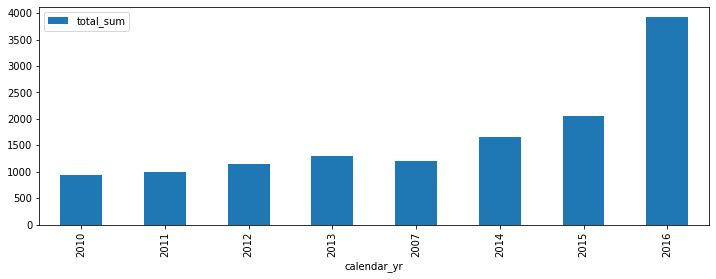

In [17]:
total_df=substances_df[['calendar_yr','total_sum']]

total_df.plot(x='calendar_yr', y='total_sum', kind='bar', figsize=(12,4))

<AxesSubplot:xlabel='calendar_yr'>

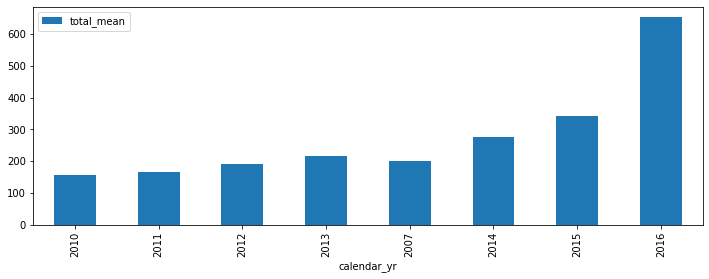

In [18]:
total_df=substances_df[['calendar_yr','total_mean']]

total_df.plot(x='calendar_yr', y='total_mean', kind='bar', figsize=(12,4))

<AxesSubplot:xlabel='calendar_yr'>

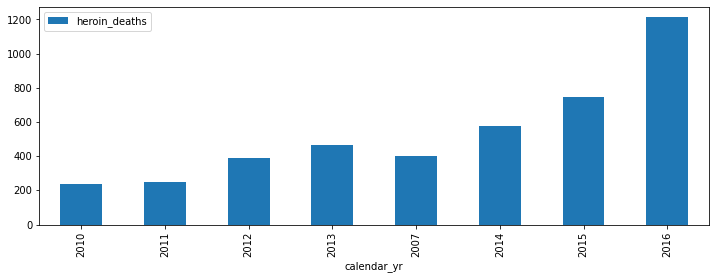

In [19]:
compare_df = substances_df[['calendar_yr','heroin_deaths']]
compare_df.plot(x='calendar_yr', y='heroin_deaths', kind='bar', figsize=(12,4))

* looking at data from 2010 and 2016 allows me to focus on a 6 year scope. 

In [20]:
substances_df[['calendar_yr', 'alcohol_deaths']].sort_values('calendar_yr')

,calendar_yr,alcohol_deaths
6,2007,187
2,2010,160
3,2011,161
4,2012,195
5,2013,238
7,2014,270
8,2015,310
9,2016,582


In [21]:
substances_df[['calendar_yr', 'fentanyl_deaths']].sort_values('calendar_yr')

,calendar_yr,fentanyl_deaths
6,2007,26
2,2010,39
3,2011,26
4,2012,29
5,2013,58
7,2014,186
8,2015,340
9,2016,1119


In [22]:
substances_df[['calendar_yr', 'heroin_deaths']].sort_values('calendar_yr')

,calendar_yr,heroin_deaths
6,2007,399
2,2010,238
3,2011,247
4,2012,392
5,2013,464
7,2014,578
8,2015,748
9,2016,1212


In [23]:
substances_df[['calendar_yr', 'cocaine_deaths']].sort_values('calendar_yr')

,calendar_yr,cocaine_deaths
6,2007,248
2,2010,135
3,2011,148
4,2012,153
5,2013,154
7,2014,198
8,2015,221
9,2016,463


### Observations: 

* 2010 had 941 total deaths  
* 2011 had 992 total deaths
* 2012 had 1,153 total deaths 
* 2013 had 1,299 total deaths 
* 2014 had 1,665 total deaths 
* 2015 had 2,061 total deaths 
* 2016 had 3,920 total deaths. 
    * From 2010 to 2016 drug related deaths went up over 3x.
* 2010 had 39 Fentanyl deaths vs. 1119 Fentanyl deaths in 2016. That is a huge increase. 
* Drug related death went up across each substance from 2010 to 2016. 

### Answers: 
* What substance lead to the most amount of deaths?
    * Heroin led to the most amount of deaths, and increased each year from 2010 to 2016. In 2010, 238 people died from Heroin and in 2016 1212 people died from heroin in Maryland. 
* What year had the most amount of deaths?
    * Every year total deaths related to drugs increased each year from 2010 to 2016. Therefore, 2016 had 3,920 total deaths related to drug intoxication.